In [66]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [67]:
databse_name = "fehring_growing_nn"
table_name = "incumbent_gen_2_layers"

In [68]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:21:50,295  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:21:50,295  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:21:50,296  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:21:50,296  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:21:50,296  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:21:50,297  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:21:50,297  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:21:50,297  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:21:50,297  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:21:50,297  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

In [69]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 2]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] - 1
minimal_cost = grow_once_minimal_cost_row["cost"]

In [70]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:21:50,887  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:21:50,887  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:21:50,888  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:21:50,888  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:21:50,888  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:21:50,889  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:21:50,889  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:21:50,889  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:21:50,889  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:21:50,889  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:21:50,972  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:21:51,118  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:21:51,205  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:21:51,207  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:21:51,208  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:21:51,209  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:21:51,211  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:21:51,212  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [71]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
4800,9101,2,2024-07-18 01:07:32,2,48,None,50000,-1.552,0.776541
4801,9102,2,2024-07-18 01:07:32,2,48,None,100000,-0.956,0.956684
4802,9103,2,2024-07-18 01:07:32,2,48,None,150000,-0.279,0.861724
4803,9104,2,2024-07-18 01:07:32,2,48,None,200000,-1.167,0.953332
4804,9105,2,2024-07-18 01:07:32,2,48,None,250000,-0.880,1.116620
...,...,...,...,...,...,...,...,...,...
4895,9196,2,2024-07-18 01:13:11,1,48,None,800000,1.000,0.000000
4896,9197,2,2024-07-18 01:13:12,1,48,None,850000,1.000,0.000000
4897,9198,2,2024-07-18 01:13:12,1,48,None,900000,1.000,0.000000
4898,9199,2,2024-07-18 01:13:12,1,48,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

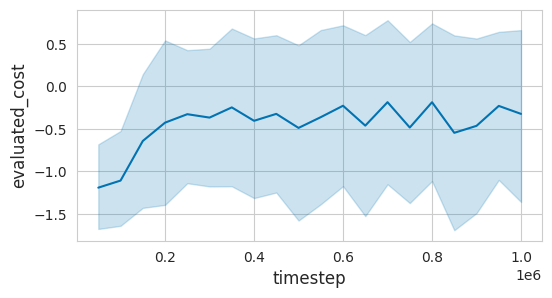

In [72]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

In [73]:
last_timestep = relevat_training_process_before_growth[relevat_training_process_before_growth["timestep"] == relevat_training_process_before_growth["timestep"].max()]
last_timestep["mean_cost"] = last_timestep["evaluated_cost"]
last_timestep

2024-08-22 11:21:51,628  | py.warnings - WARNING  | /tmp/ipykernel_357776/818150378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_timestep["mean_cost"] = last_timestep["evaluated_cost"]

2024-08-22 11:21:51,628  | py.warnings - WARNING  | /tmp/ipykernel_357776/818150378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_timestep["mean_cost"] = last_timestep["evaluated_cost"]

2024-08-22 11:21:51,628  | py.warnings - WARNING  | /tmp/ipykernel_357776/818150378.py:2: SettingWithCopyWarning: 
A

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev,mean_cost
4819,9120,2,2024-07-18 01:07:34,2,48,None,1000000,-0.683,1.080070,-0.683
4839,9140,2,2024-07-18 01:07:37,4,48,None,1000000,-1.951,0.018682,-1.951
4859,9160,2,2024-07-18 01:08:06,0,48,None,1000000,-0.983,0.983728,-0.983
4879,9180,2,2024-07-18 01:12:00,3,48,None,1000000,1.000,0.000000,1.000
4899,9200,2,2024-07-18 01:13:12,1,48,None,1000000,1.000,0.000000,1.000


# Add Grow Once Data

## 0.1 Noise

In [74]:
table_name = "net2deeper_grow_width_once"

In [75]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 1]


2024-08-22 11:21:51,655  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:21:51,655  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:21:51,655  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:21:51,656  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:21:51,656  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:21:51,656  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:21:51,656  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:21:51,656  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:21:51,656  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:21:51,656  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:21:51,727  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:21:51,876  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:21:51,961  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:21:51,962  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:21:51,964  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:21:51,965  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:21:51,966  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:21:51,967  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [76]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] -1 
minimal_cost = grow_once_minimal_cost_row["cost"]


In [77]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:21:52,228  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:21:52,229  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:21:52,229  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:21:52,229  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:21:52,230  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:21:52,230  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:21:52,230  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:21:52,230  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:21:52,231  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:21:52,231  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:21:52,758  | py.warnings - WARNING  | /tmp/ipykernel_357776/1680061873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] = relevat_training_process_after_growth["timestep"] + relevat_training_process_before_growth["timestep"].max()

2024-08-22 11:21:52,758  | py.warnings - WARNING  | /tmp/ipykernel_357776/1680061873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] = relevat_training_process

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

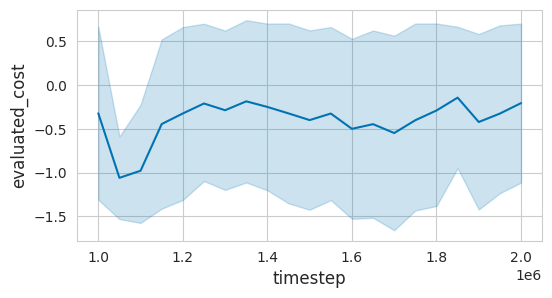

In [78]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_after_growth["timestep"] = relevat_training_process_after_growth["timestep"] + relevat_training_process_before_growth["timestep"].max()
relevat_training_process_after_growth = pd.concat([last_timestep, relevat_training_process_after_growth])
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

## 0.2 Noise

In [79]:
table_name_2 = "net2deeper_grow_width_once_new"

In [80]:
grow_once_cost_2 = get_logtable(databse_name, table_name_2, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
grow_once_cost_2 = grow_once_cost_2[grow_once_cost_2["experiment_id"] == 2]

2024-08-22 11:21:52,985  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:21:52,985  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:21:52,985  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:21:52,986  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:21:52,986  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:21:52,986  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:21:52,986  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:21:52,986  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:21:52,987  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:21:52,987  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:21:53,059  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:21:53,208  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:21:53,295  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:21:53,296  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:21:53,298  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:21:53,299  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:21:53,301  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:21:53,302  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [81]:
grow_once_cost_2

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,50,2,2024-07-24 10:44:57,1,None,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.6454
1,51,2,2024-07-24 10:53:07,2,None,"{'batch_size': 256, 'ent_coef': 0.107882379647...",1.7328
2,52,2,2024-07-24 11:04:27,3,None,"{'batch_size': 128, 'ent_coef': 0.229283551219...",0.7846
3,53,2,2024-07-24 11:40:56,4,None,"{'batch_size': 32, 'ent_coef': 0.0017112052068...",0.3292
4,54,2,2024-07-24 12:17:04,5,None,"{'batch_size': 32, 'ent_coef': 0.2912519236095...",1.9646
5,55,2,2024-07-24 12:29:54,6,None,"{'batch_size': 128, 'ent_coef': 0.068384815938...",0.8640
6,56,2,2024-07-24 12:39:28,7,None,"{'batch_size': 256, 'ent_coef': 0.194468993693...",1.5024
7,57,2,2024-07-24 13:04:02,8,None,"{'batch_size': 64, 'ent_coef': 0.1208517263643...",1.1442
8,58,2,2024-07-24 13:15:50,9,None,"{'batch_size': 64, 'ent_coef': 0.2583484316244...",1.4330
9,59,2,2024-07-24 13:29:36,10,None,"{'batch_size': 256, 'ent_coef': 0.035920777637...",0.7634


In [82]:
# select row with minimal cost
grow_once_minimal_cost_row_2 = grow_once_cost_2.loc[grow_once_cost_2["cost"].idxmin()]
minimal_cost_experiment_id_2 = grow_once_minimal_cost_row_2["experiment_id"]
minimal_cost_trial_2 = grow_once_minimal_cost_row_2["trial_number"] -1 
minimal_cost_2  = grow_once_minimal_cost_row_2["cost"]

In [83]:
training_process_after_growth_2 = get_logtable(databse_name, table_name_2, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:21:53,565  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:21:53,565  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:21:53,566  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:21:53,566  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:21:53,566  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:21:53,567  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:21:53,567  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:21:53,567  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:21:53,567  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:21:53,567  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:21:59,943  | py.warnings - WARNING  | /tmp/ipykernel_357776/1241771169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-08-22 11:21:59,943  | py.warnings - WARNING  | /tmp/ipykernel_357776/1241771169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-08-22 1

<Axes: xlabel='timestep', ylabel='mean_cost'>

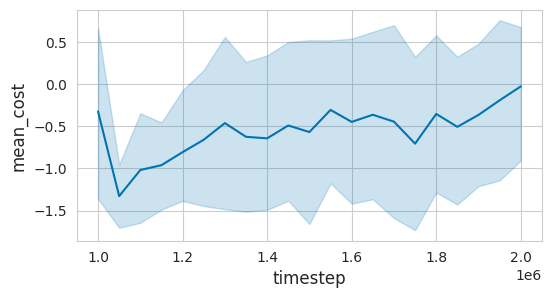

In [84]:
relevat_training_process_after_growth_2 = training_process_after_growth_2[(training_process_after_growth_2["experiment_id"] == minimal_cost_experiment_id_2) & (training_process_after_growth_2["trial_number"] == minimal_cost_trial_2)]
relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()
relevat_training_process_after_growth_2 = pd.concat([last_timestep, relevat_training_process_after_growth_2])
sns.lineplot(data=relevat_training_process_after_growth_2, x="timestep", y="mean_cost")

# Optimized Noise

In [85]:
table_name_3 = "net2deeper_grow_width_once_new"

In [86]:
optimized_noise_samc_callback = get_logtable(databse_name, table_name_3, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
optimized_noise_samc_callback = optimized_noise_samc_callback[optimized_noise_samc_callback["experiment_id"] == 5]

2024-08-22 11:22:00,161  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:22:00,162  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:22:00,162  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:22:00,162  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:22:00,162  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:22:00,163  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:22:00,163  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:22:00,163  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:22:00,163  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:22:00,163  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:22:00,236  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:22:00,385  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:22:00,493  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:22:00,495  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:22:00,497  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:22:00,498  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:22:00,499  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:22:00,501  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [87]:
optimized_noise_row = optimized_noise_samc_callback.loc[optimized_noise_samc_callback["cost"].idxmin()]
minimal_cost_experiment_id_3 = optimized_noise_row["experiment_id"]
minimal_cost_trial_3 = optimized_noise_row["trial_number"] -1

In [88]:
optimize_noise_training_process = get_logtable(databse_name, table_name_3, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
relevat_training_process_after_growth_3 = optimize_noise_training_process[(optimize_noise_training_process["experiment_id"] == minimal_cost_experiment_id_3) & (optimize_noise_training_process["trial_number"] == minimal_cost_trial_3)]

2024-08-22 11:22:00,761  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:22:00,761  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:22:00,761  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:22:00,761  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:22:00,762  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:22:00,762  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:22:00,762  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:22:00,762  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:22:00,762  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:22:00,762  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:22:07,979  | py.warnings - WARNING  | /tmp/ipykernel_357776/1573284263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_process_after_growth_3["timestep"] += training_process_after_growth_3["timestep"].max()

2024-08-22 11:22:07,979  | py.warnings - WARNING  | /tmp/ipykernel_357776/1573284263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_process_after_growth_3["timestep"] += training_process_after_growth_3["timestep"].max()

2024-08-22 11:22:07,979  | py.warnings - W

<Axes: xlabel='timestep', ylabel='mean_cost'>

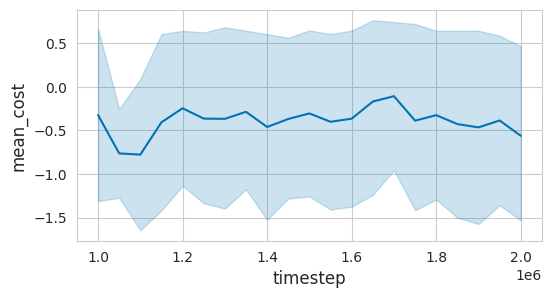

In [89]:
training_process_after_growth_3 = optimize_noise_training_process[(optimize_noise_training_process["experiment_id"] == minimal_cost_experiment_id_3) & (optimize_noise_training_process["trial_number"] == minimal_cost_trial_3)]
training_process_after_growth_3["timestep"] += training_process_after_growth_3["timestep"].max()
training_process_after_growth_3 = pd.concat([last_timestep, training_process_after_growth_3])
sns.lineplot(data=training_process_after_growth_3, x="timestep", y="mean_cost")

# Add Baseline

In [90]:
table_name = "hpo_warmstart"

In [91]:
warmstarting_table = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_cost_warmstarting = warmstarting_table[warmstarting_table["experiment_id"] == 5]

2024-08-22 11:22:08,199  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:22:08,200  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:22:08,200  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:22:08,200  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:22:08,200  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:22:08,200  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:22:08,200  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:22:08,201  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:22:08,201  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:22:08,201  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:22:08,272  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:22:08,420  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:22:08,506  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:22:08,508  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:22:08,508  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:22:08,509  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:22:08,511  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:22:08,511  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [92]:
samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"] -1
minimal_cost = samc_cost_warmstarting_row["cost"]

In [93]:
samc_cost_warmstarting_row

ID                                                                             115
experiment_id                                                                    5
timestamp                                                      2024-07-17 04:39:32
trial_number                                                                    49
budget                                                                        None
hyperparameter_str_identifier    {'batch_size': 32, 'ent_coef': 0.0005309372850...
cost                                                                       -0.5228
Name: 48, dtype: object

In [94]:
training_process_after_warmstarting = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:22:08,778  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:22:08,779  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:22:08,779  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:22:08,779  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:22:08,780  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:22:08,780  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:22:08,780  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:22:08,780  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:22:08,780  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:22:08,781  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:22:08,852  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:22:09,000  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:22:09,091  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:22:09,092  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:22:09,093  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:22:09,095  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:22:09,096  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:22:09,097  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [95]:
training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 5) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,evaluated_cost,evaluated_stdev
4800,11481,5,2024-07-17 04:31:37,3,48,1000000,None,50000,-1.563000e+00,0.782663
4801,11482,5,2024-07-17 04:31:37,3,48,1000000,None,100000,-3.860000e-01,0.772117
4802,11483,5,2024-07-17 04:31:37,3,48,1000000,None,150000,-3.820000e-01,0.764327
4803,11484,5,2024-07-17 04:31:37,3,48,1000000,None,200000,1.100000e-02,0.746384
4804,11485,5,2024-07-17 04:31:37,3,48,1000000,None,250000,-9.700000e-02,0.691868
...,...,...,...,...,...,...,...,...,...,...
4895,11576,5,2024-07-17 04:39:30,0,48,1000000,None,800000,-1.920000e-01,0.576000
4896,11577,5,2024-07-17 04:39:30,0,48,1000000,None,850000,-3.860000e-01,1.093590
4897,11578,5,2024-07-17 04:39:30,0,48,1000000,None,900000,8.940700e-09,1.095450
4898,11579,5,2024-07-17 04:39:30,0,48,1000000,None,950000,2.000000e-01,0.400000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

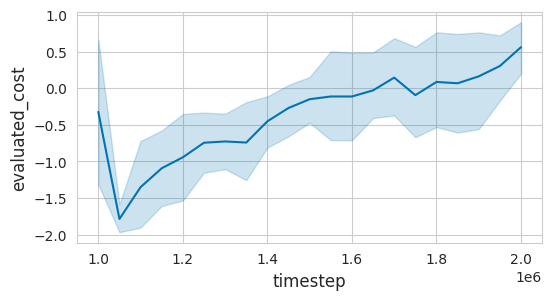

In [96]:
# Plot training process after warmstarting
training_process_after_warmstarting = training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 5) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
training_process_after_warmstarting = pd.concat([last_timestep, training_process_after_warmstarting])
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

<Figure size 600x300 with 0 Axes>

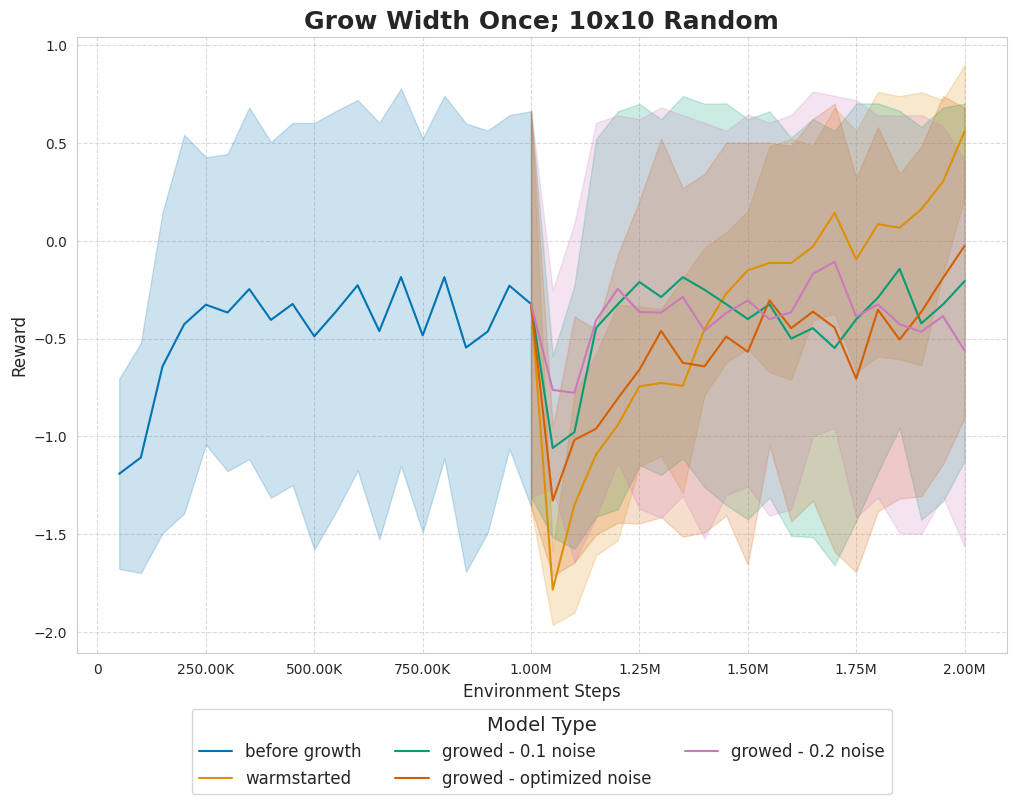

In [97]:
import seaborn as sns
from utils.plotting import training_process_style
training_process_style()
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost", label="before growth")
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost", label="warmstarted")
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost", label="growed - 0.1 noise")
sns.lineplot(data=relevat_training_process_after_growth_2, x="timestep", y="mean_cost", label="growed - optimized noise")
sns.lineplot(data=training_process_after_growth_3, x="timestep", y="mean_cost", label="growed - 0.2 noise")

plt.xlabel("Environment Steps")
plt.ylabel("Reward")
plt.legend(title="Model Type", fontsize=12, title_fontsize=14, loc="center", bbox_to_anchor=(0.5, -0.16), ncol=3)
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Grow Width Once; 10x10 Random", fontsize=18, fontweight="bold")
plt.savefig("plotting/minihack/grow_width_once/grow_width_once_10x10_random.png", dpi=300, bbox_inches="tight")